<a href="https://colab.research.google.com/github/Mayank-004/Covid-19-/blob/main/Covid19_Death_Predictive_Analysis_Imbalance_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 




## Importing the libraries

In [301]:
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import matplotlib
from sklearn.metrics import auc

random.seed(786)
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve,precision_recall_curve,plot_precision_recall_curve



## Importing the dataset







In [302]:
url1 = '/content/drive/MyDrive/Colab Notebooks/Covid Dataset/covid.csv'
dataset = pd.read_csv(url1, error_bad_lines=False)


dataset.head(2)


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [303]:
dataset.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


Filling missing values of Target column MOIC

In [304]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent


In [305]:
dataset['death'] = dataset['date_died'].apply(lambda x: 1 if x == '9999-99-99' else 0)


In [306]:
# drop some unnecessary columns
dataset.drop(columns={"id","patient_type",
                 "entry_date","date_symptoms",
                 "date_died","pregnancy"}, axis=1, inplace=True)

In [307]:
dataset

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death
0,2,97,2,27,2,2,2,2,2,2,2,2,2,2,2,1,97,1
1,2,97,2,24,2,2,2,2,2,2,2,2,2,2,99,1,97,1
2,1,2,2,54,2,2,2,2,2,2,2,1,2,2,99,1,2,1
3,2,2,1,30,2,2,2,2,2,2,2,2,2,2,99,1,2,1
4,1,2,2,60,1,2,2,2,1,2,1,2,2,2,99,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,97,2,58,1,2,2,2,2,2,2,2,2,2,2,3,97,1
566598,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,3,97,1
566599,1,2,1,49,2,2,2,2,2,2,2,1,2,2,99,3,2,1
566600,1,97,1,43,2,2,2,2,2,2,2,2,2,2,2,3,97,1


In [308]:
# checking if dataset is balanced or imbalanced
dataset['death'].value_counts(normalize=True)

1    0.936153
0    0.063847
Name: death, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


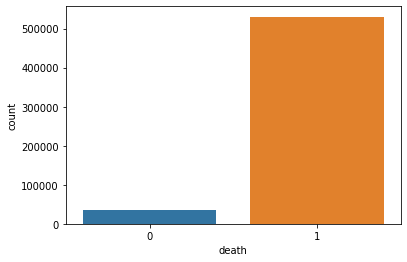

In [309]:
sn.countplot(dataset['death'])


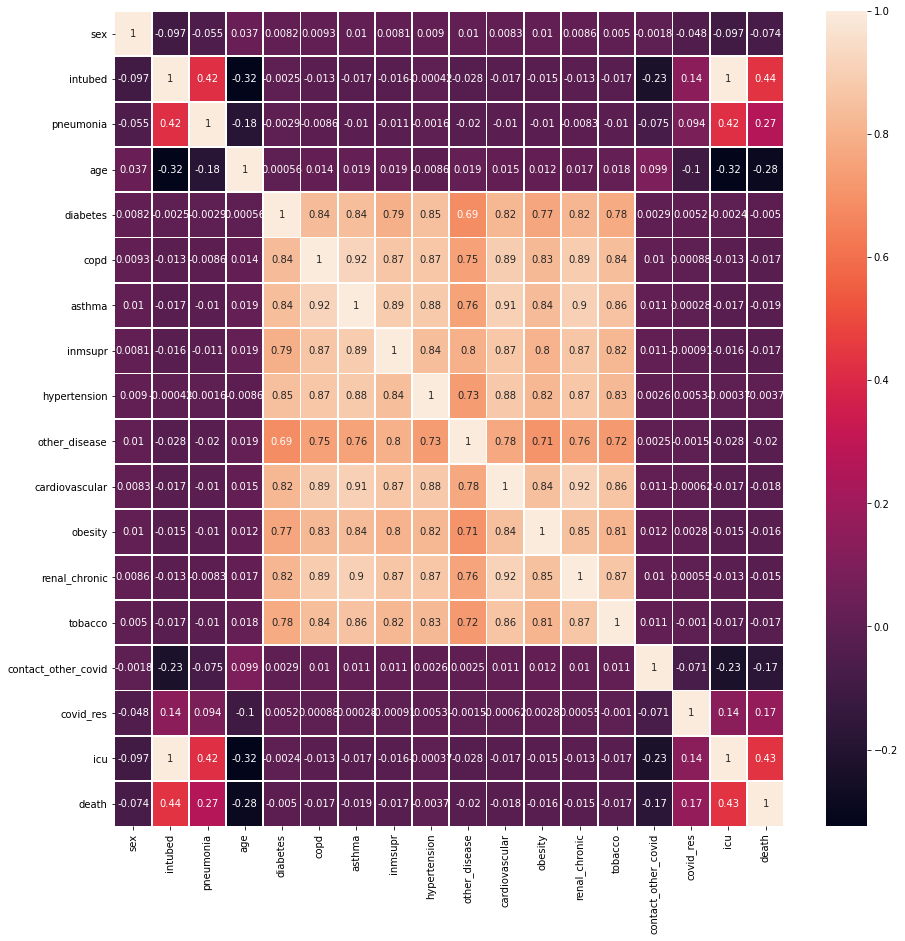

In [310]:
# Correlation Matrix
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [311]:
# Drop Column with perfect correlation
dataset.drop(columns={"icu"}, axis=1, inplace=True)

In [312]:
X = dataset.loc[:,dataset.columns!='death']
Y = dataset['death']


## Splitting the dataset into the Training set and Test set

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 786, stratify=Y)

### Building Models

Defining Function for Model Performance evaluation

In [314]:
def eval_result(model_name,X,y,y_pred):
    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
    from matplotlib import pyplot as plt

    train_accuracy = accuracy_score(y, y_pred)
    print(f'accuracy is {train_accuracy}')
    #train_roc_auc = roc_auc_score(y_train, y_predtrain) 
    #print(f' Area under the ROC curve for training data {train_roc_auc}')
    plot_roc_curve(model_name, X, y)

    plot_precision_recall_curve(model_name,X,y)
    print(classification_report(y,y_pred,digits=5))
    plot_confusion_matrix(model_name, X, y,cmap=plt.cm.pink, normalize = 'all')


In [315]:
def run_model(model,X_train,y_train,verbose=True):
    t0=time.time()
    if verbose== False:
        model.fit(X_train,y_train.ravel(),verbose=0)
    else :
        model.fit(X_train,y_train.ravel())
    
    time_taken= time.time()- t0

    print(f'Time taken: {time_taken}')

Random Forest

In [ ]:
# Hyperparameter Tuning
# run once

'''from sklearn.ensemble import RandomForestClassifier


n_estimators_hyp = [100,200,300,400,500,700,1000]
min_sample_leaf_hyp = np.linspace(1,20, 20);

oobscore_list=dict()

for i in n_estimators_hyp:
    for j in min_sample_leaf_hyp:
        model2 = RandomForestClassifier(n_estimators=i, min_samples_leaf=int(j), oob_score=True);
        model2.fit(X_train, y_train)
        key = "n_estimator =" +str(i)+" min_sample_leaf ="+str(j);
        oobscore_list[key]=model2.oob_score_

    #oobscore_list.append(rf_model.oob_score_)

oobscore_list'''

In [316]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=400,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1,
                            class_weight={0:9999,1:1})
#rf.fit(X_train, y_train.values)
run_model(rf,X_train,y_train)
print("%.4f" % rf.oob_score_)

Time taken: 173.37085151672363
0.7999


Predicting result

In [317]:
y_predtest_rf= rf.predict(X_test)

y_predtrain_rf = rf.predict(X_train)


accuracy is 0.8166486393811725
              precision    recall  f1-score   support

           0    0.25828   1.00000   0.41053     25323
           1    1.00000   0.80414   0.89144    371298

    accuracy                        0.81665    396621
   macro avg    0.62914   0.90207   0.65099    396621
weighted avg    0.95264   0.81665   0.86074    396621



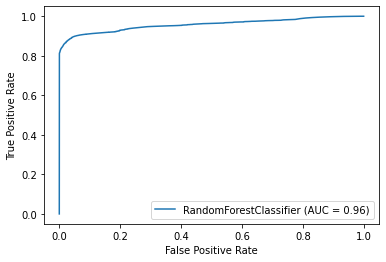

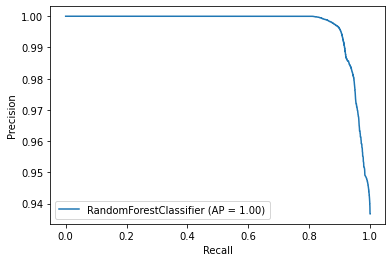

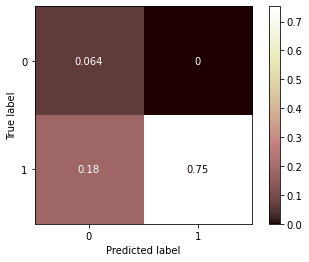

In [318]:
# evaluating result for training data

eval_result(rf,X_train,y_train,y_predtrain_rf)


accuracy is 0.8019013889787682
              precision    recall  f1-score   support

           0    0.21995   0.82567   0.34736     10853
           1    0.98536   0.80028   0.88323    159128

    accuracy                        0.80190    169981
   macro avg    0.60265   0.81298   0.61529    169981
weighted avg    0.93649   0.80190   0.84901    169981



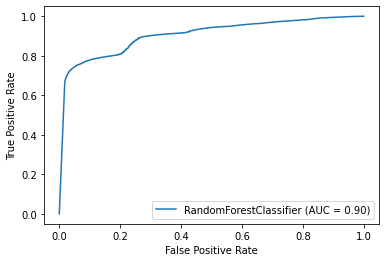

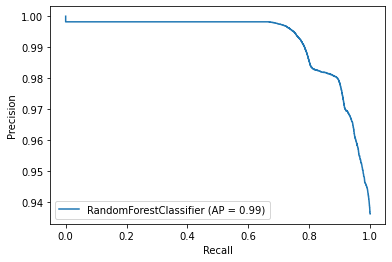

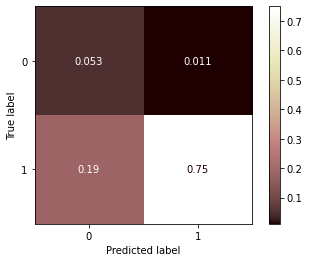

In [319]:
# evaluating result for testing data

eval_result(rf,X_test,y_test,y_predtest_rf)


In [ ]:
# get importance
rf.feature_importances_


array([0.01352789, 0.18282423, 0.1118199 , 0.27583773, 0.02015345,
       0.01099423, 0.00828207, 0.01058627, 0.02071646, 0.01414788,
       0.01244461, 0.01828796, 0.01301372, 0.01539102, 0.05328348,
       0.0735605 , 0.14512858])

Text(0.5, 0, 'Random Forest Feature Importance')

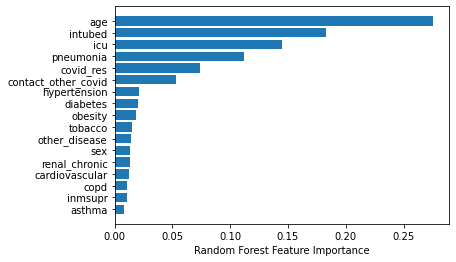

In [ ]:
# Visual presentation of important feature 

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Random Forest with Oversampling

In [320]:
# define oversampling strategy
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)

In [321]:

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [213]:
'''X_over=pd.DataFrame(X_over)
y_over=pd.DataFrame(y_over)'''

In [322]:
X_trainover, X_testover, y_trainover, y_testover = train_test_split(X_over, y_over, test_size = 0.3, random_state = 786,stratify=y_over)

In [323]:
from sklearn.ensemble import RandomForestClassifier
rf_Oversample = RandomForestClassifier(criterion='gini', 
                             n_estimators=400,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1,
                            #class_weight={0:9999,1:1}
                            )
#rf_Oversample.fit(X_trainover, y_trainover)
run_model(rf_Oversample,X_trainover,y_trainover)

Time taken: 356.50573086738586


In [324]:
# predicting result for train and test data
y_predtest_rfover= rf_Oversample.predict(X_testover)

y_predtrain_rfover = rf_Oversample.predict(X_trainover)


accuracy is 0.9339973103365311
              precision    recall  f1-score   support

           0    0.86449   0.95108   0.90572    185649
           1    0.97425   0.92546   0.94923    371298

    accuracy                        0.93400    556947
   macro avg    0.91937   0.93827   0.92747    556947
weighted avg    0.93766   0.93400   0.93472    556947



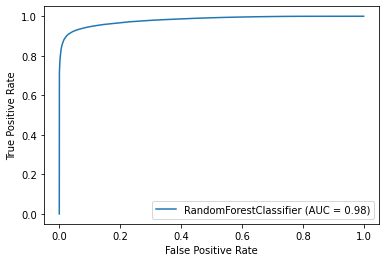

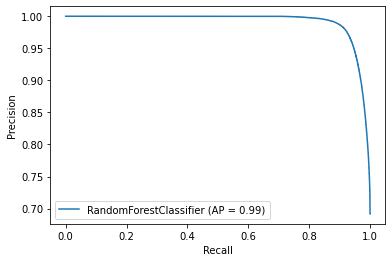

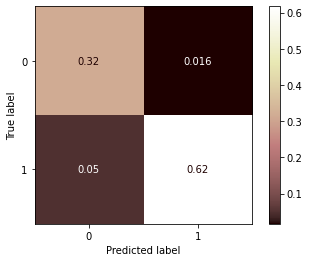

In [325]:
# evaluating train data result

eval_result(rf_Oversample,X_trainover,y_trainover,y_predtrain_rfover)

accuracy is 0.9175757880448444
              precision    recall  f1-score   support

           0    0.83571   0.93691   0.88342     79564
           1    0.96642   0.90791   0.93625    159128

    accuracy                        0.91758    238692
   macro avg    0.90107   0.92241   0.90984    238692
weighted avg    0.92285   0.91758   0.91864    238692



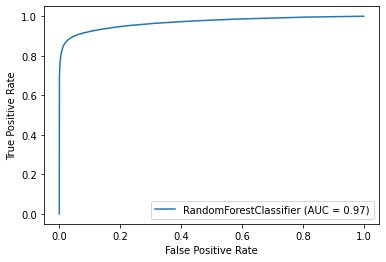

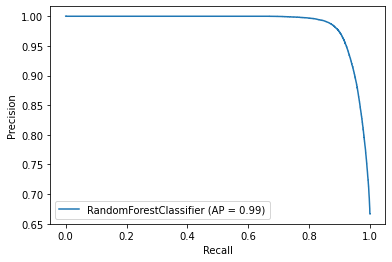

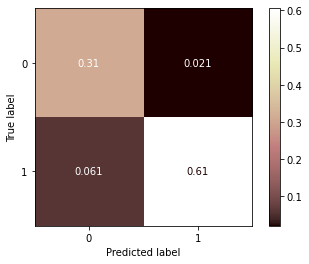

In [326]:
# evaluating test data result

eval_result(rf_Oversample,X_testover,y_testover,y_predtest_rfover)

###Random Forest with Undersampling

In [225]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [226]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [227]:
X_trainunder, X_testunder, y_trainunder, y_testunder = train_test_split(X_under, y_under, test_size = 0.3, random_state = 786)

In [230]:
from sklearn.ensemble import RandomForestClassifier
rf_undersample = RandomForestClassifier(criterion='gini', 
                             n_estimators=400,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1,
                            )
run_model(rf_undersample,X_trainunder,y_trainunder)

Time taken: 23.310018062591553


In [232]:
y_predtest_rfund= rf_undersample.predict(X_testunder)

y_predtrain_rfund = rf_undersample.predict(X_trainunder)


accuracy is 0.9200331714251866
              precision    recall  f1-score   support

           0    0.84892   0.92492   0.88529     25345
           1    0.96065   0.91759   0.93862     50624

    accuracy                        0.92003     75969
   macro avg    0.90478   0.92125   0.91196     75969
weighted avg    0.92337   0.92003   0.92083     75969



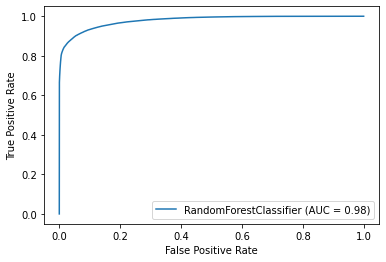

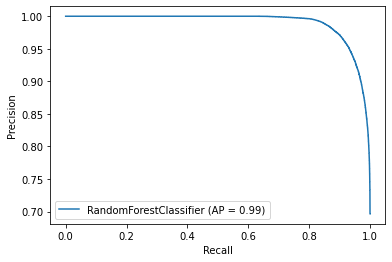

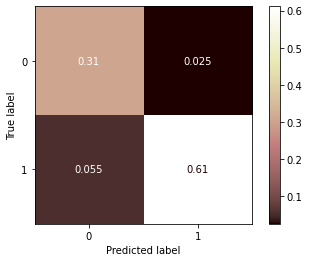

In [292]:
# evaluating train result

eval_result(rf_undersample,X_trainunder,y_trainunder,y_predtrain_rfund)

accuracy is 0.8811695690899598
              precision    recall  f1-score   support

           0    0.79301   0.86982   0.82964     10831
           1    0.93181   0.88683   0.90877     21728

    accuracy                        0.88117     32559
   macro avg    0.86241   0.87832   0.86920     32559
weighted avg    0.88564   0.88117   0.88244     32559



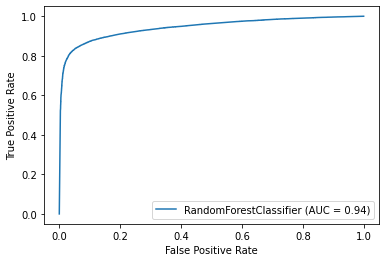

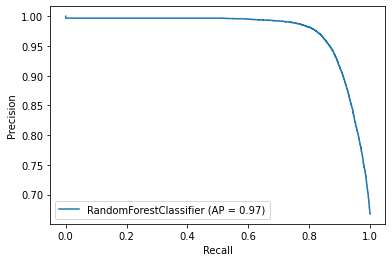

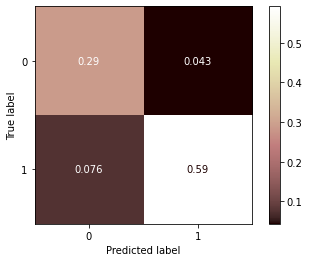

In [294]:
# evaluating test result

eval_result(rf_undersample,X_testunder,y_testunder,y_predtest_rfund)